<a href="https://colab.research.google.com/github/areej-haq/Video-Game-Sales/blob/main/CapstonIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data collected from: https://www.kaggle.com/gregorut/videogamesales

The dataset I'm using is the dataset from Kaggle called video game sales which is a dataset that has more than 16,500 games (about 16,598 records). It has fields such as the name, rank, game genre, and sales from different continents and countries. This dataset has a list of video games that all have sold a number of copies greater than 100,000 per game.

##Description of the Data

- Rank - Ranking of overall sales

- Name - The games name

- Platform - Platform of the games release (i.e. PC,PS4, etc.)

- Year - Year of the game's release

- Genre - Genre of the game

- Publisher - Publisher of the game

- NA_Sales - Sales in North America (in millions)

- EU_Sales - Sales in Europe (in millions)

- JP_Sales - Sales in Japan (in millions)

- Other_Sales - Sales in the rest of the world (in millions)

- Global_Sales - Total worldwide sales.


#Hypotheses

- Ha: There is no significant difference between Shooter game sales in Japan and North America. 
- Ho: There is a signifcant difference between Shooter game sales in Japan and North America. 



- Ha: There is no significant difference between North American and European sales for the Wii.
- Ho: There is a significant difference between North American sales and European sales for the Wii.

##Key Activities

- Explore the dataset and extract insights using Exploratory Data Analysis.

- Prove statistically whether or not shooter game sales are different in Japan's sales compared to the sales in North America.

- Determine which region we should allocate more dollars in for games under the shooter genre.

- Prove statistically where the Wii sold more games between North America and Europe

- Determine based off of the sales of wii games between North America and Europe where we should invest in selling more product into.

##Why? 
I find exploring both of these hypotheses would help a company determine where they would make the most profit for their products and looking at past sales is a great way for a company to understand the trendlines of their sales so they can expand their business. I find this interesting because so many different regions prefer different things and its really interesting to see what appeals to different people all over the world.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

# import dataset
games_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Videogame data.csv")

# configure jupyter to allow each cell to display multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Wrangle data and see what we're working with

In [ ]:
games_df.shape

(16598, 11)

In [ ]:
games_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
games_df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
games_df.info

<bound method DataFrame.info of         Rank  ... Global_Sales
0          1  ...        82.74
1          2  ...        40.24
2          3  ...        35.82
3          4  ...        33.00
4          5  ...        31.37
...      ...  ...          ...
16593  16596  ...         0.01
16594  16597  ...         0.01
16595  16598  ...         0.01
16596  16599  ...         0.01
16597  16600  ...         0.01

[16598 rows x 11 columns]>

This is where I start to break down data to get into the specifics of the columns I need for testing

In [ ]:
# How many unique genres are there?
print("There are {} unique genres".format(games_df['Genre'].nunique()))

genres_counts = games_df['Genre'].value_counts()
print(genres_counts)

There are 12 unique genres
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64


In [ ]:
# How many unique platforms are there?
print("There are {} unique platforms".format(games_df['Platform'].nunique()))

Platform_counts = games_df['Platform'].value_counts()
print(Platform_counts)

There are 31 unique platforms
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64


#Cleaning up our data

In [ ]:
games_df.isnull().sum() #.sum()  

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# Checking for rows with a null in any column.
null_rows = games_df[games_df.isnull().any(axis=1)]   # rows(0), columns(1)

print("There are {} rows with a null out of {} rows in the dataset".format(len(null_rows),len(games_df)))
null_rows.head(10)

There are 307 rows with a null out of 16598 rows in the dataset


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


In [ ]:
# Figure out where all the nulls are.
null_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 179 to 16553
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          307 non-null    int64  
 1   Name          307 non-null    object 
 2   Platform      307 non-null    object 
 3   Year          36 non-null     float64
 4   Genre         307 non-null    object 
 5   Publisher     249 non-null    object 
 6   NA_Sales      307 non-null    float64
 7   EU_Sales      307 non-null    float64
 8   JP_Sales      307 non-null    float64
 9   Other_Sales   307 non-null    float64
 10  Global_Sales  307 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 28.8+ KB


In [ ]:
# Clean out your data.
print("The starting size of games_df is {}".format(len(games_df)))
clean_games=games_df.dropna()
print("The size of the cleaned dataframe is {}".format(len(clean_games)))

The starting size of games_df is 16598
The size of the cleaned dataframe is 16291


In [ ]:
# Make sure all of your data is cleaned.
clean_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#Descriptive Statistics

In [ ]:
# Finding the Descriptive statistics for the cleaned data for the North American sales,
clean_games['NA_Sales'].describe()

count    16291.000000
mean         0.265647
std          0.822432
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64

In [ ]:
# And for the Japan sales
clean_games['JP_Sales'].describe()

count    16291.000000
mean         0.078833
std          0.311879
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_Sales, dtype: float64

In [ ]:
# And then we clean up the data for the platforms as well. 
clean_games['Platform'].describe()

count     16291
unique       31
top          DS
freq       2131
Name: Platform, dtype: object

In [ ]:
# Since we are focusing on the Shooter games genre, we have to isoalte it from the other 11 genres in the column.
Shooter_games =clean_games[clean_games['Genre'] == 'Shooter']

In [ ]:
# Our second hypothesis focuses on the Wii, we need to isolate that too.
Wii =clean_games[clean_games['Platform'] == 'Wii']

Use the describe function to make sure everything looks good

In [ ]:
Shooter_games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000
mean,7331.832293,2005.918877,0.448643,0.242161,0.029782,0.079485,0.800468
std,4965.647201,6.354083,1.211770,0.553916,0.103431,0.201352,1.833578
min,10.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2778.000000,2003.000000,0.040000,0.010000,0.000000,0.000000,0.080000
50%,7042.000000,2007.000000,0.120000,0.050000,0.000000,0.020000,0.230000
75%,11623.250000,2010.000000,0.380000,0.230000,0.010000,0.070000,0.740000
max,16597.000000,2016.000000,26.930000,5.880000,1.440000,2.520000,28.310000


In [ ]:
Wii.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000
mean,7697.413178,2008.962791,0.385558,0.204922,0.052930,0.061395,0.705279
std,4459.646975,1.532734,1.553489,1.093037,0.304071,0.307099,3.177537
min,1.000000,2006.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4024.250000,2008.000000,0.050000,0.000000,0.000000,0.010000,0.090000
50%,7536.000000,2009.000000,0.140000,0.010000,0.000000,0.010000,0.200000
75%,11144.000000,2010.000000,0.330000,0.110000,0.000000,0.040000,0.490000
max,16584.000000,2015.000000,41.490000,29.020000,4.700000,8.460000,82.740000


#Hypothesis 1 testing

Shooter games T-test

In [ ]:
# Run an independent T-test to determine if the sales of shooter games in North America is greater than that of Japan
stats.ttest_ind(clean_games['NA_Sales'][clean_games['Genre'] == 'Shooter'], clean_games['JP_Sales'][clean_games['Genre'] == 'Shooter'])

Ttest_indResult(statistic=12.331552330400239, pvalue=5.526769266190573e-34)


Given the results of our t-test, because our p-value is less than our alpha, we can conclude there is a statistically signficant difference in the average Shooter game sales between the regions of Japan and North America. 

#Hypothesis 2 testing

Wii game sales T-test

In [ ]:
stats.ttest_ind(Wii['EU_Sales'], Wii['NA_Sales'])

Ttest_indResult(statistic=-3.4155566871010277, pvalue=0.0006463698748333678)


Given the results of our t-test, because our p-value is less than our alpha, we can conclude there is a statistically signficant difference in the average game sales for the wii between the regions of Europe and North America. 

#Correlations

In [ ]:
# Use the pearson method to find the calulations for the clean_games data
clean_games.corr(method='pearson')

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178027,-0.400315,-0.379137,-0.269323,-0.332735,-0.426975
Year,0.178027,1.000000,-0.091285,0.006108,-0.169387,0.041128,-0.074647
NA_Sales,-0.400315,-0.091285,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,-0.379137,0.006108,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.269323,-0.169387,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,-0.332735,0.041128,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.426975,-0.074647,0.941269,0.903264,0.612774,0.747964,1.000000


In [ ]:
wii_corr =stats.pearsonr(Wii['NA_Sales'], Wii['EU_Sales'])
print('Results of pearsonr for Wii game sales in North America and Europe:' , wii_corr)

shooter_corr =stats.pearsonr(clean_games['JP_Sales'][clean_games['Genre'] == 'Shooter'],clean_games['NA_Sales'][clean_games['Genre'] == 'Shooter'])
print('Results of pearsonr for Shooter game sales in Japan and in North America:' , shooter_corr)

Results of pearsonr for Wii game sales in North America and Europe: (0.9715952347200393, 0.0)
Results of pearsonr for Shooter game sales in Japan and in North America: (0.22213755451626432, 8.511037003309373e-16)


The Pearson correlation coefficient of 0.97 indicates there is a Very strong positive linear correlation between Wii game sales in North America and Wii game sales in Europe.

The Pearson correlation coefficient of 0.22 indicates there is a Weak positive linear correlation between Shooter game sales in North America and Shooter game sales in Japan.

#Visualizations

Shooter game sales at a scale of 100,000 units sold; comparing North American sales to Japan sales

<Figure size 720x576 with 0 Axes>

Text(0.5, 0, 'North American Sales')

Text(0, 0.5, 'Japan Sales')

Text(0.5, 1.0, 'North American vs Japan sales for Shooter Games')

(0.0, 5.0)

(0.0, 5.0)

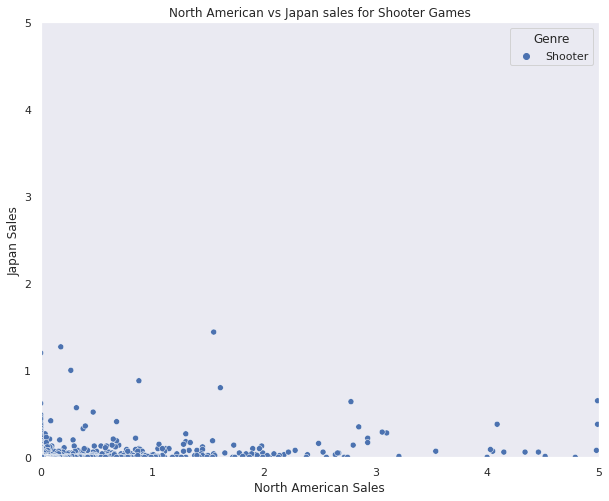

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style("dark") 
sns.despine()
sns.scatterplot(x="NA_Sales", y="JP_Sales", hue="Genre", data=clean_games[clean_games['Genre'] == 'Shooter'])
plt.xlabel("North American Sales")
plt.ylabel("Japan Sales")
plt.title('North American vs Japan sales for Shooter Games')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()

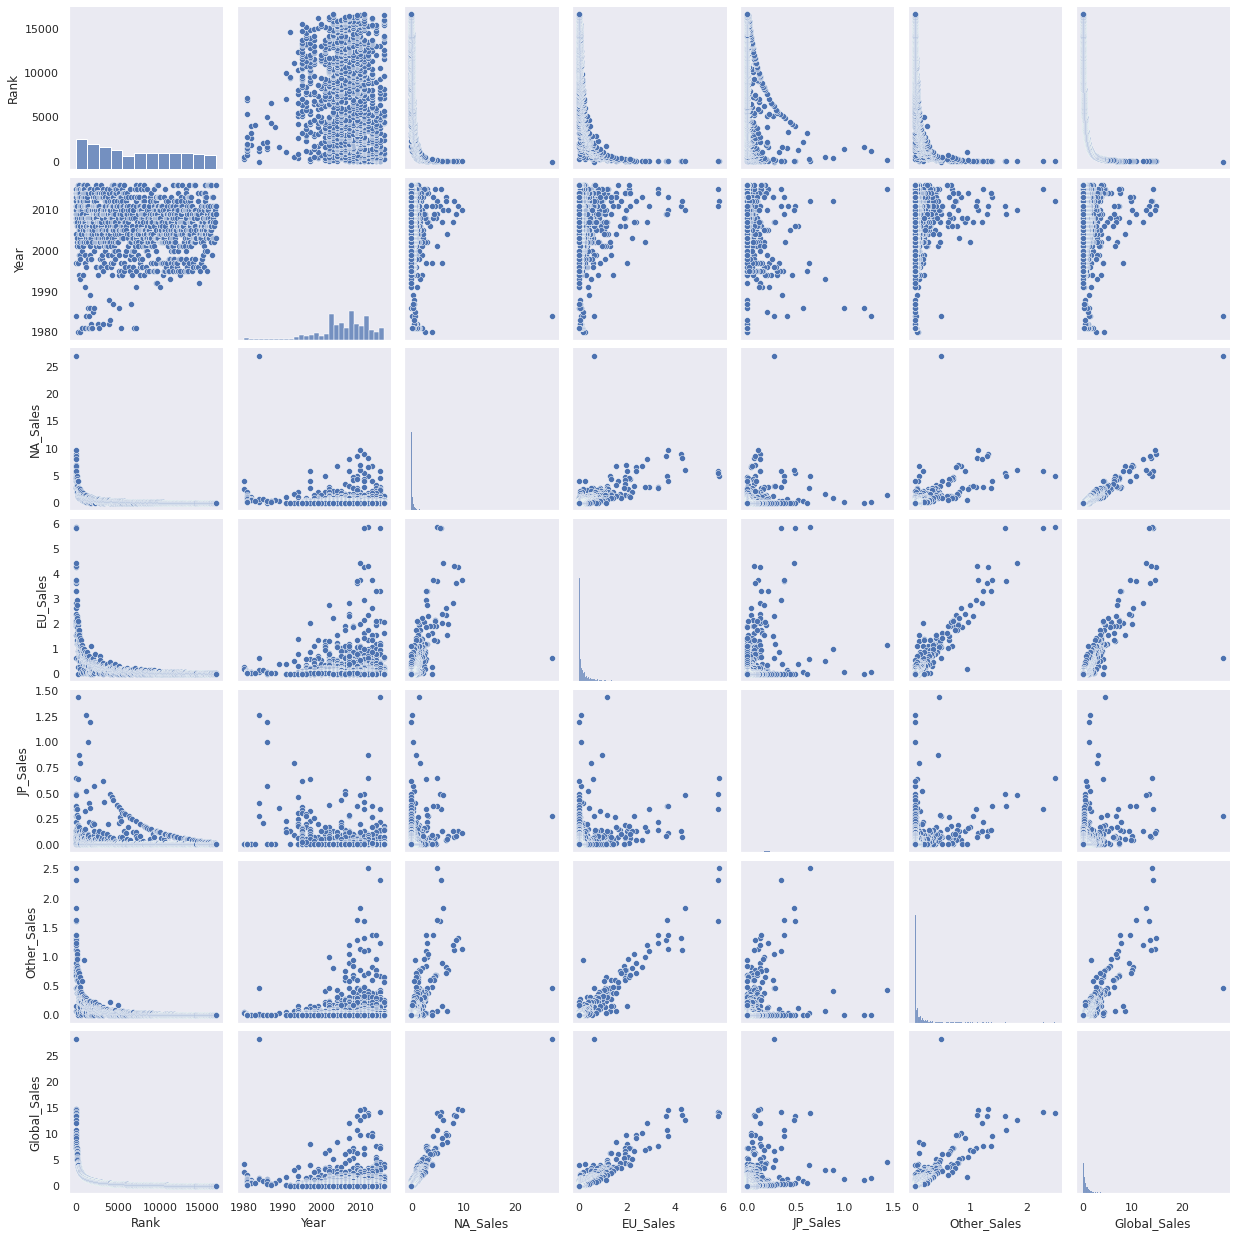

In [ ]:
sns.pairplot(Shooter_games) 

Wii game sale comparisons between Europe and North America scaled at 100,000

<Figure size 720x576 with 0 Axes>

Text(0.5, 0, 'North American Sales')

Text(0, 0.5, 'European Sales')

Text(0.5, 1.0, 'North American vs European sales for Wii Games')

(0.0, 5.0)

(0.0, 5.0)

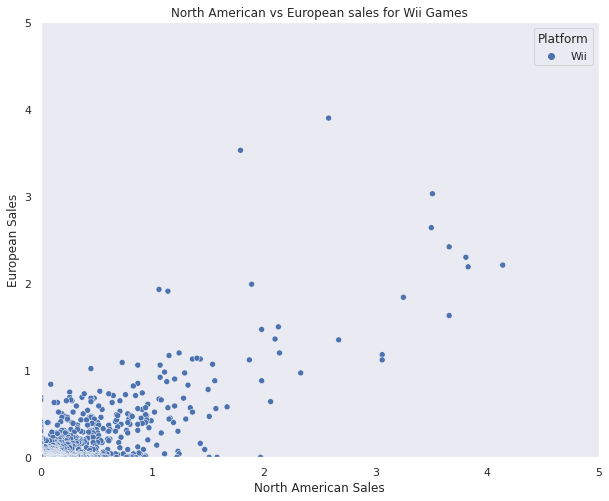

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style("dark") 
sns.despine()
sns.scatterplot(x="NA_Sales", y="EU_Sales", hue="Platform", data=Wii)
plt.xlabel("North American Sales")
plt.ylabel("European Sales")
plt.title('North American vs European sales for Wii Games')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()


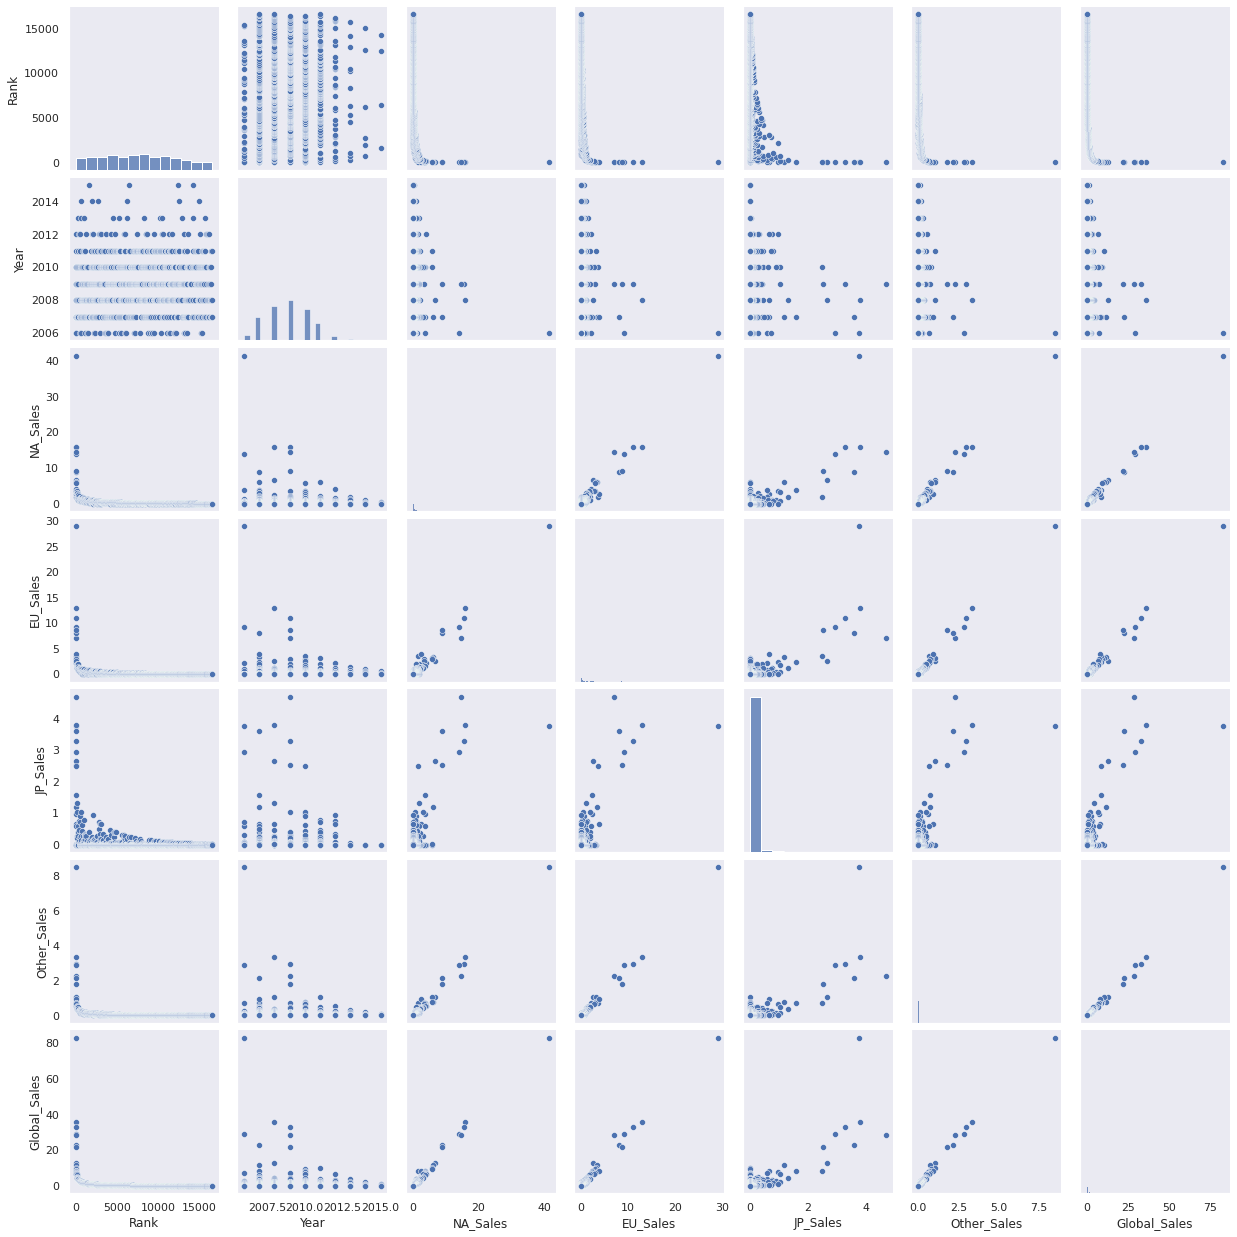

In [ ]:
sns.pairplot(Wii) 

#Results

**Hypothesis 1 results:** Failed to reject the null hypothesis, there is quite the significant difference in sales of shooter games between North America and Japan.


**Hypothesis 2 results:** Failed to reject the null hypothesis, there is quite the significant difference in wii game sales between North America and Europe.

#What does this mean? 

This means that, based off of the data that was provided, the sales for certain video game genres and platforms vary based off of region. This means companies should look at which genres and where each platform perform better based off of past sales.  

##Recommendations: 
>Companies should allocate more dollars towards selling shooter game copies to the North American region compared to the Japan region. 

>Based off of the game sales of the wii, the companies should cater to selling games more to North America than to Europe.